In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# クラスタリング

## k-meansクラスタリング

- 最も単純で広く用いられるクラスタリングアルゴリズム
- データのある領域を代表するようなクラスタ重心を見つける
- 次の2ステップで実行されれる
    1. 個々のデータポイントを最寄りのクラスタ重心に割り当てる
    2. 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する
    - データポイントの割り当てが変化しなくなったらアルゴリズムを終了する

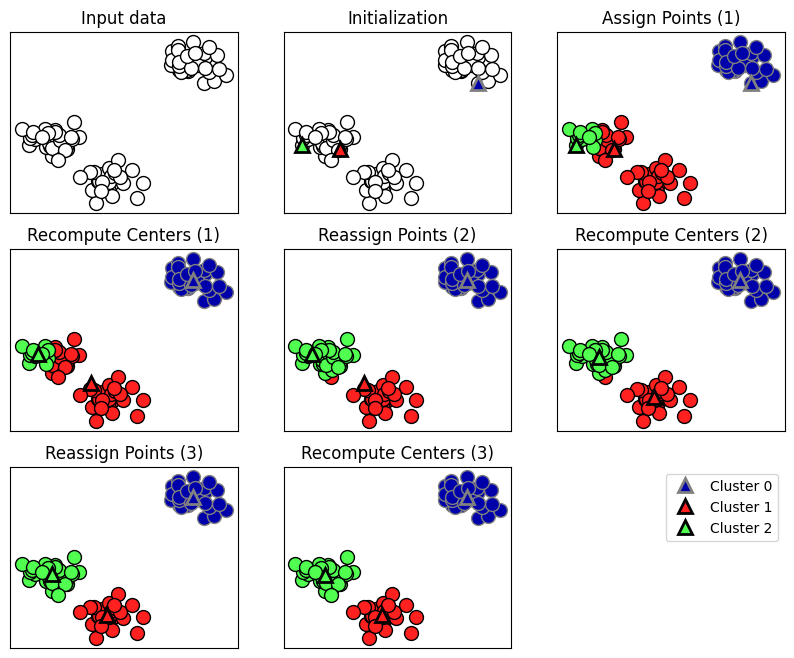

In [2]:
# 合成データセットにk-meansクラスタリングを適用した例
mglearn.plots.plot_kmeans_algorithm()

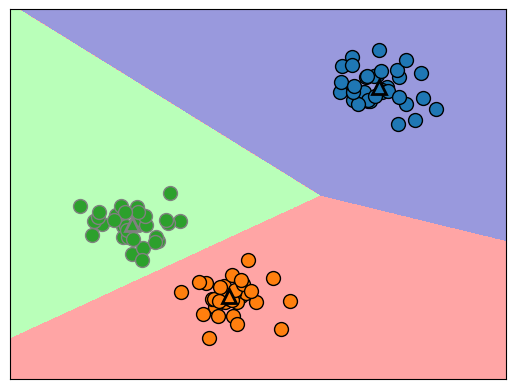

In [3]:
# 学習して得られたクラスタセンタの境界
mglearn.plots.plot_kmeans_boundaries()

In [9]:
# k-meansクラスタリングの利用手順
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

# クラスタリング結果
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [10]:
# predictメソッドを訓練セットに対して実行
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


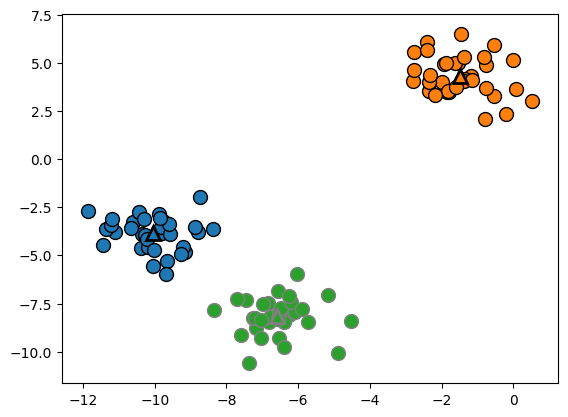

In [11]:
# データをプロットする
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

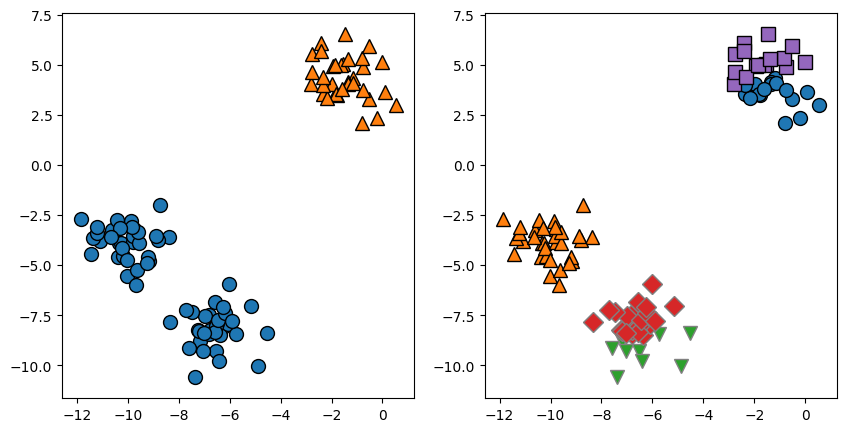

In [14]:
# クラスタの数を減らす
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Feature 1')

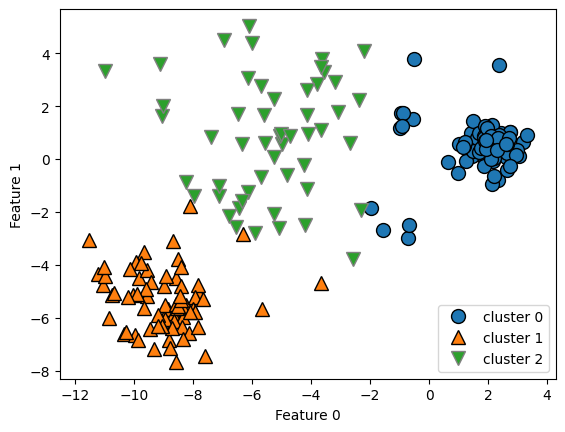

In [20]:
# k-meansがうまくいかない場合①
# 異なる濃度（分散）を持ったデータに対してk-meansでクラスタ分割する
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0, n_init='auto').fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

[[ 0.60834549 -0.63667341]
 [-0.40887718  0.85253229]]


Text(0, 0.5, 'Feature 1')

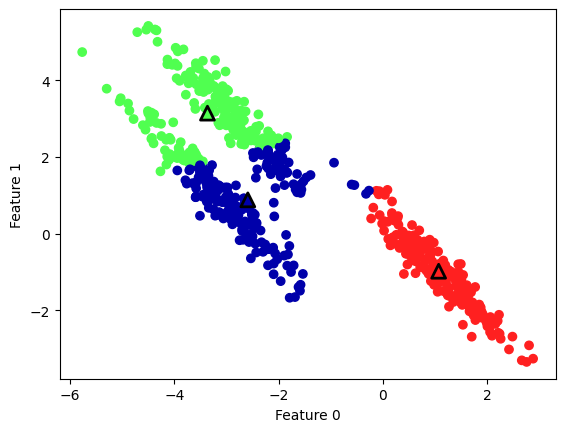

In [57]:
# k-meansがうまくいかない場合②
# データの分布の方向が意味を持つデータに対してk-meansでクラスタ分割する
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
print(transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidths=2, cmap=mglearn.cm3,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

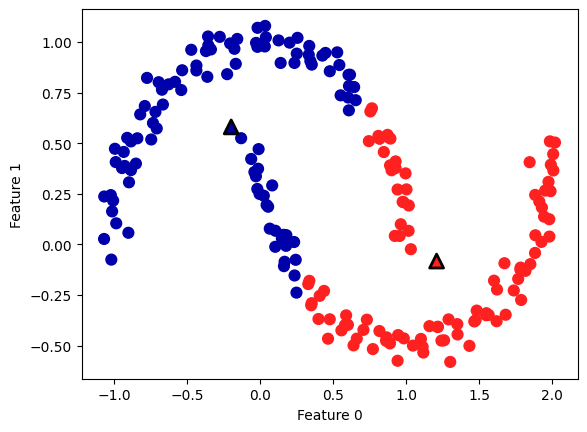

In [58]:
# k-meansがうまくいかない場合③
# データの分布が複雑のデータ（two_moons）に対してk-meansでクラスタ分割する
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### ベクトル量子化、もしくは成分分解としてのk-means

- PCAでは、データ中の<b>極端な特徴</b>を見つける
- NMFでは、データ中の<b>足し込んでいくことのできる成分</b>を見つける
- これらに対して、k-meansでは、クラスタセンタとして与えられる単一の成分で、データポイントを表現する
    - このように、単一成分で個々のデータポイントを表現する成分分解手法を<b>ベクトル量子化（vector quantization）</b>と呼ぶ

/tmp/ipykernel_25181/2738749929.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


X_people.shape: (2063, 5655)
y_people.shape: (2063,)


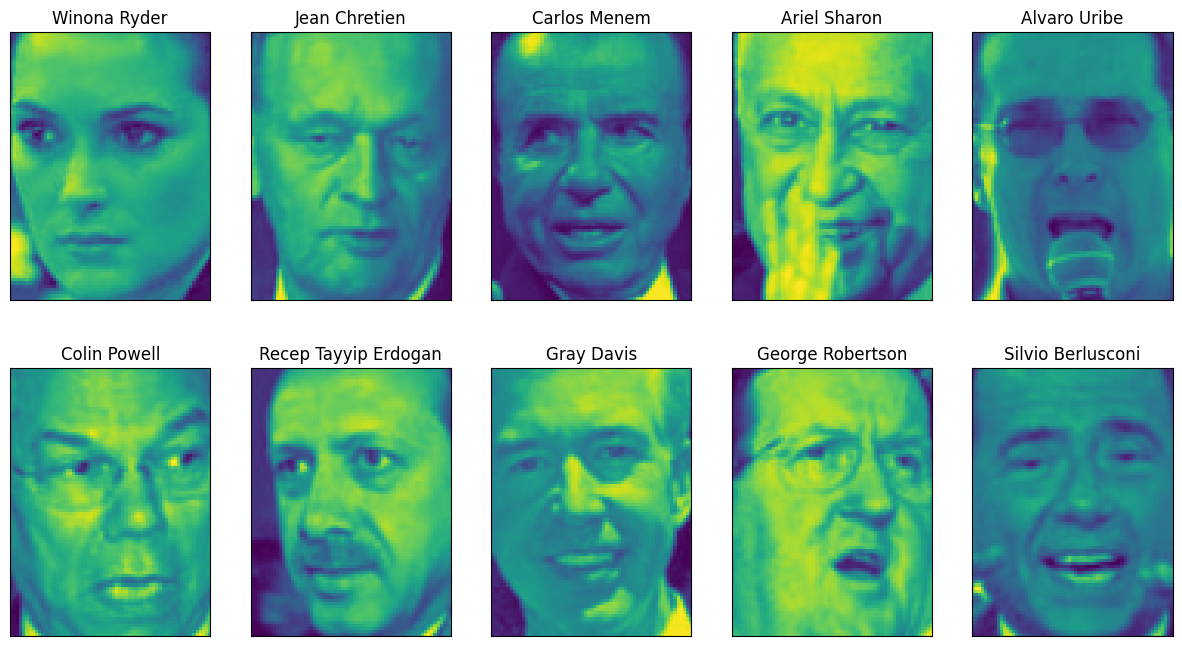

In [61]:
# Labeled Faces in the Wildデータセットの準備
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
# データセット中の各人の画像を50枚に制限する
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されているグレースケールの値を、0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

# データはベクトル化されている（87x65=5655）
print("X_people.shape: {}".format(X_people.shape))
print("y_people.shape: {}".format(y_people.shape))

In [68]:
# PCA, NMF, k-meansを使って、顔画像の特徴抽出
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'nmf')

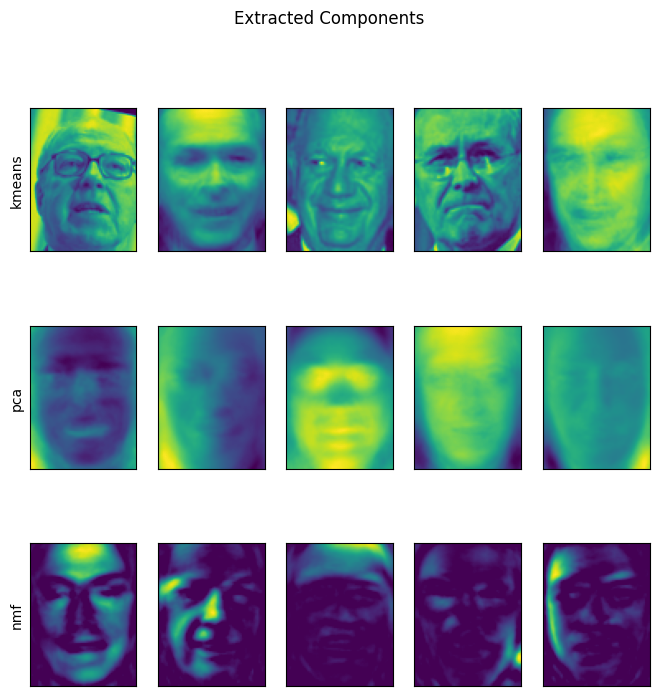

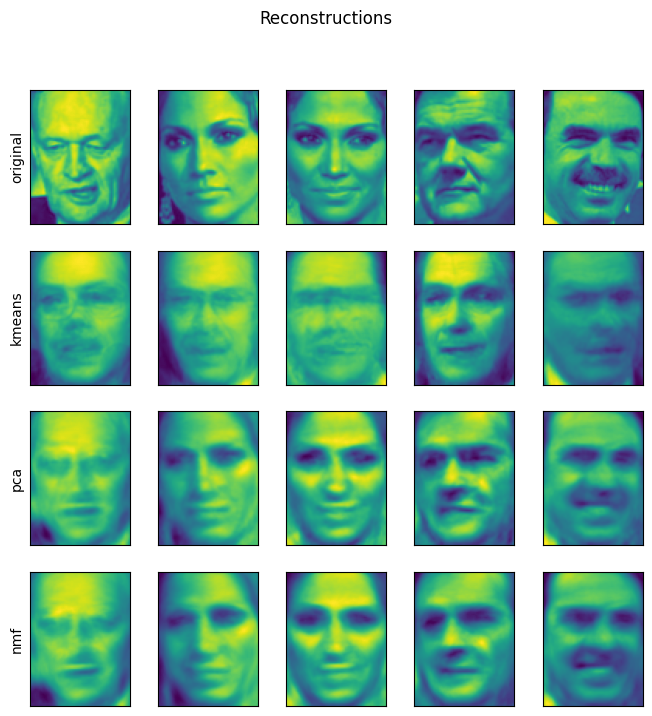

In [69]:
# 抽出された成分と、各成分を用いた再構成の図示
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

- k-meansの再構成画像は、画像ごとに1つのクラスタセンタのみを用いている
    - すなわち、同じクラスタに属する画像の平均画像を表示している
    - 抽出された成分で原画像が表示されているものは、クラスタに一つだけデータポイントが存在する場合

### k-meansによる次元拡張

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


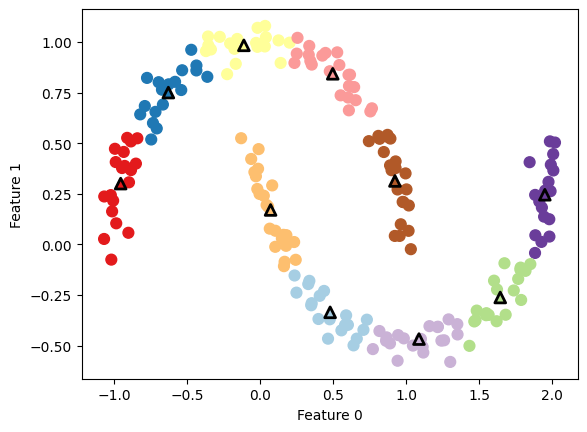

In [71]:
# 入力するデータの次元よりも多数のクラスタセンタでk-meansを適用する
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

- 2次元のデータを10次元の特徴量のone-hotベクトルで表現していると考えることができる
    - 赤色のクラスタをクラス0とすると、$\mathbf{x}=\{1, 0, 0, 0, 0, 0, 0, 0, 0, 0\}^T$

In [72]:
# クラスタセンタからの距離を特徴量として用いる
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


- 各データポイントと、すべてのクラスタセンタとの距離が格納される
    - データポイントは一番近いクラスタのクラスに分類される

- 利点
    - 比較的理解しやすく、実装しやすい
    - 比較的高速に実行できる
    - 非常に大規模なデータセットに対しては、<b>MiniBatchKMeans</b>を利用できる
- 欠点
    - 初期化が乱数で行われるため、試行時に結果が変化する
        - scikit-learnでは、異なる乱数を用いて10回実行し、最良の（個々のクラスタの分散の和が最小となる）結果を出力する
    - クラスタの形に対して、かなり強い仮定を置いている
        - クラスタは、クラスタセンタに対して円形（一定の距離内）に分布する
    - 探しているクラスタの数をユーザが指定する必要がある

## 凝集型クラスタリング

- 以下の原則に基づく一連のクラスタリングアルゴリズム
    - 個々のデータポイントをそれぞれ個別のクラスタとして開始し、<b>最も類似した2つのクラスタを併合</b>する
    - これを<b>何らかの終了条件</b>が満たされるまで繰り返す
- scikit-learnに実装されている終了条件は「クラスタの数」
    - 指定した数のクラスタだけが残るまで、似たクラスタを併合していく
- 「最も類似したクラスタ」を決定する連結（linkage）度には以下のものがある
    - ward：併合した際にクラスタ内の分散の増分が最小になるように2つのクラスタを選択する
    - average：クラスタ間のすべてのポイント間の距離の平均値が最小の2つのクラスタを選択する
    - complete：2つのクラスタの点間の距離の最大値が最小となる2つのクラスタを選択する